# PCA through Singular Value Decomposition

In [ ]:
import numpy as np
from sklearn import decomposition

# Defined 3 points in 2D-space:
# I add dtype = float because digit sensitivity 
X=np.array([[2, 1, 0],[4, 3, 0]], dtype=float)
# Calculate the mean vector:
mean_vec = X.mean(axis=1, keepdims=True)
# Center the data:
X_centered = X - mean_vec
n_samples = X.shape[1]
# Calculate the covariance matrix:
R = (X_centered @ X_centered.T) / (n_samples - 1)
[U,D,Vt]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]

# Calculate the new coordinates in the new basis
coords = U.T @ X_centered
coords_reduced = np.copy(coords)
coords_reduced[1, :] = 0

# Reconstruct the data
X_centered_recon = U @ coords_reduced
X_reconstructed = X_centered_recon + mean_vec 
print(X_reconstructed) # add second dimention to array and test it


# Check that you got the original


[[ 1.8200922   1.25607376 -0.07616596]
 [ 4.08426431  2.88006147  0.03567423]]


In this step, there is multi-layeredness in the data sets, that is, more than one thing affects the tip in a restaurant, but we want not to lose data while analyzing them and we want to make it more meaningful, and there it is necessary to standardize the data.

# PCA on Iris data

In [34]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

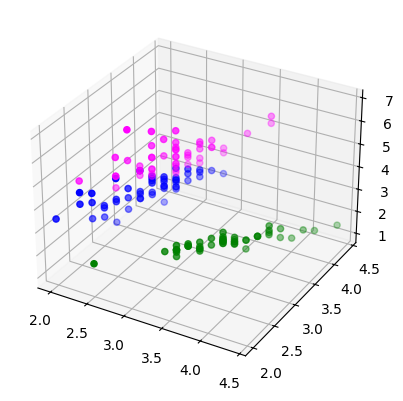

In [35]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

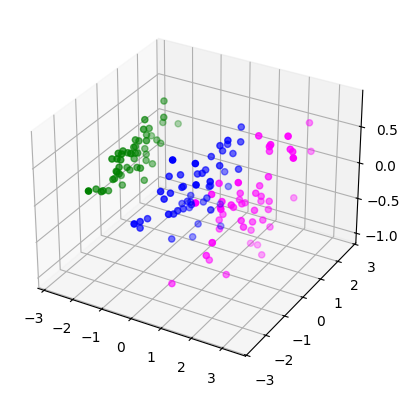

In [63]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
#print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show


In [ ]:
# Compute pca.explained_variance_ and pca.explained_variance_ratio_values
pca.explained_variance_
#This value helps understand component importance 

array([2.93808505, 0.9201649 , 0.14774182])

We see that first component so important in data and after a few code row, we will see how to change accuarcy of KNN without first component.

In [65]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

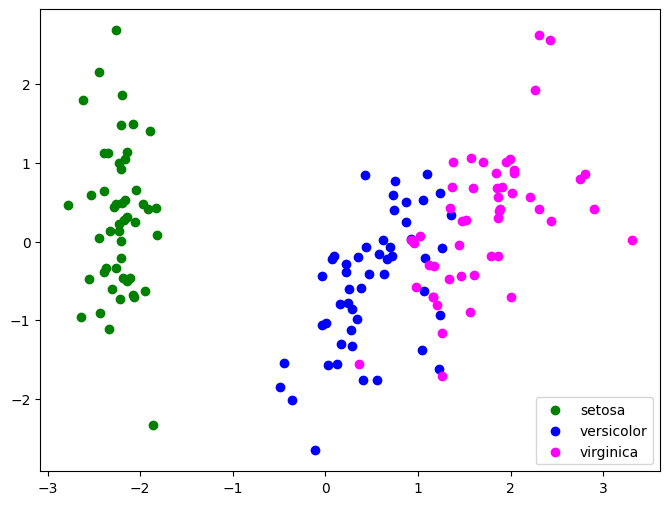

In [84]:
# We implement the PCA from scratch
from sklearn.decomposition import PCA

# we need to scale the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now, we can apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# we plot the data in the new 2D space
plt.figure(figsize=(8,6))
colors = ['green', 'blue', 'magenta']
labels = iris.target_names

for i, label in enumerate(labels):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=colors[i], label=label)

# we add labels and title
plt.legend()
plt.show()


# KNN classifier

1.0


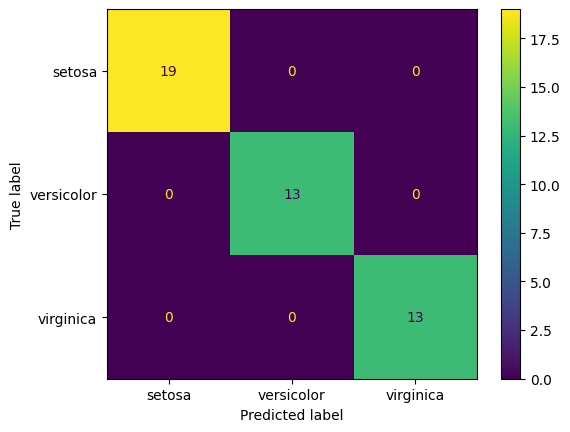

In [82]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#Firstly, we split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xpp, y, test_size=0.3, random_state=42)

#Then, we train the KNN classifier on the full 4-dimensional X
knn1=KNeighborsClassifier(n_neighbors = 3)
#Train the model using the training sets
knn1.fit(X_train,y_train)
#Predict the response for test dataset
y_pred=knn1.predict(X_test)
# Model Accuracy, how often is the classifier correct?
accuracy_full = accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
#calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
#plot confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
display.plot()
plt.show()




Accuracy of KNN with PCA data: 0.8889


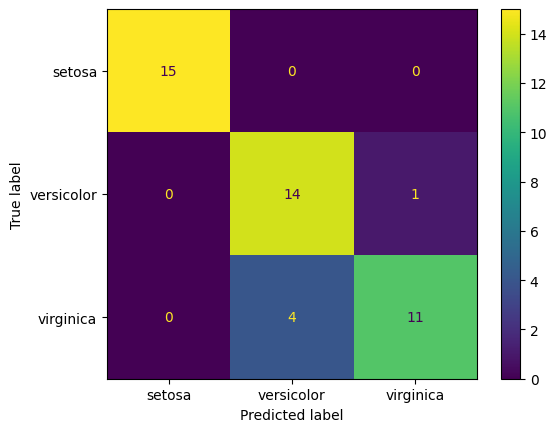

In [69]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns). 
# Compare the results with full dataset
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# train KNN model on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)

# predict the response for test dataset
y_pred_pca = knn_pca.predict(X_test_pca)

# calculate the accuracy of the model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy of KNN with PCA data: {accuracy_pca:.4f}")

# plot the confusion matrix
cm_pca = confusion_matrix(y_test, y_pred_pca)
disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca, display_labels=iris.target_names)
disp_pca.plot(cmap='viridis')
plt.show()

Accuracy after removing the 3rd principal component: 0.8889


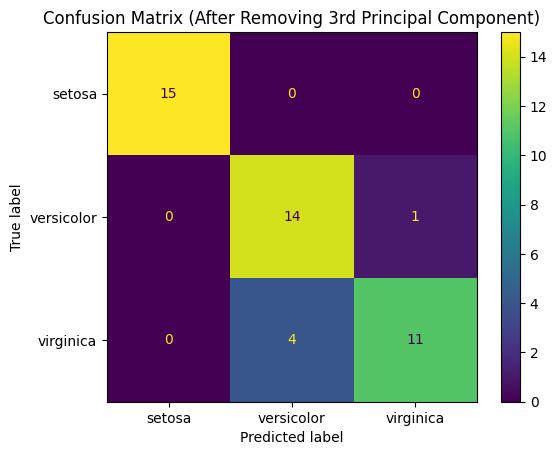

In [ ]:
# Now, we will remove the 3rd principal component and see how it affects the accuracy of the model
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_pp)  # X_pca_3 = Data reduced to 3 principal components

# Remove the 3rd principal component (keep only the first two)
X_train_pca_no3, X_test_pca_no3, y_train, y_test = train_test_split(
    X_pca_3[:, :2], y, test_size=0.3, random_state=42, stratify=y
)  # Now, we only have 2 principal components

# Train KNN classifier (k=3) on the new reduced dataset
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca_no3, y_train)

# Make predictions on the test set
y_pred_no3 = knn.predict(X_test_pca_no3)

# Compute accuracy
accuracy_no3 = accuracy_score(y_test, y_pred_no3)
print(f"Accuracy after removing the 3rd principal component: {accuracy_no3:.4f}")

#  Compute and visualize the confusion matrix
cm_pca_no3 = confusion_matrix(y_test, y_pred_no3)
disp_pca_no3 = ConfusionMatrixDisplay(confusion_matrix=cm_pca_no3, display_labels=iris.target_names)
disp_pca_no3.plot(cmap='viridis')
plt.title("Confusion Matrix (After Removing 3rd Principal Component)")
plt.show()


Accuracy after removing the 1st principal component: 0.4222


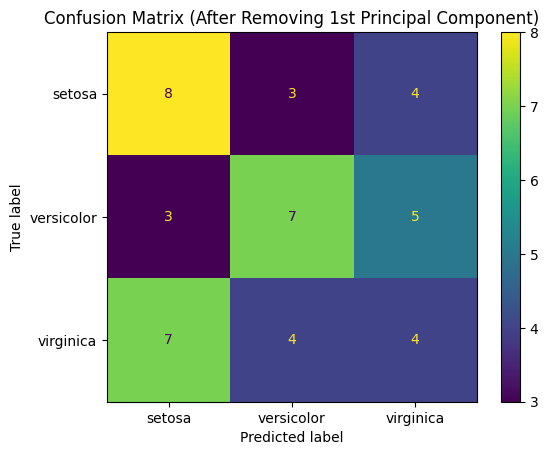

In [ ]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)
# Remove the 1st principal component (keep only the 2nd and 3rd components)
X_train_pca_no1, X_test_pca_no1, y_train, y_test = train_test_split(
    X_pca_3[:, 1:3], y, test_size=0.3, random_state=42, stratify=y
)  # Now we only keep the 2nd and 3rd principal components

#Train KNN classifier (k=3) on the modified dataset
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca_no1, y_train)

#Make predictions on the test set
y_pred_no1 = knn.predict(X_test_pca_no1)

#Compute accuracy
accuracy_no1 = accuracy_score(y_test, y_pred_no1)
print(f"Accuracy after removing the 1st principal component: {accuracy_no1:.4f}")

#Compute and visualize the confusion matrix
cm_pca_no1 = confusion_matrix(y_test, y_pred_no1)
disp_pca_no1 = ConfusionMatrixDisplay(confusion_matrix=cm_pca_no1, display_labels=iris.target_names)
disp_pca_no1.plot(cmap='viridis')
plt.title("Confusion Matrix (After Removing 1st Principal Component)")
plt.show()


In [85]:
#Now, we compare the accuracies of the models because we train the KNN classifier on the full dataset, PCA-transformed data, and the modified datasets
# I think it is better to use a table to compare the results
print(f"Full dataset accuracy: {accuracy_full :.4f}")
print(f"PCA accuracy: {accuracy_pca:.4f}")
print(f"After removing 3rd component: {accuracy_no3:.4f}")
print(f"After removing 1st component: {accuracy_no1:.4f}")


Full dataset accuracy: 1.0000
PCA accuracy: 0.8889
After removing 3rd component: 0.8889
After removing 1st component: 0.4222


We see that when the first component was removed, there was a serious loss of accuracy in the model. This shows how important the 1st component is for the data.